In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data1 : car_clean1, data2 : poker_data 

In [91]:
df = pd.read_csv('Min_Max_sample.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   Y1      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [9]:
df.head()

,X1,Y1
0,151582.88060,74034.73453
1,94673.48517,61039.72531
2,121163.17440,116968.05230
3,78454.66336,127421.30740
4,175366.42630,68454.79138


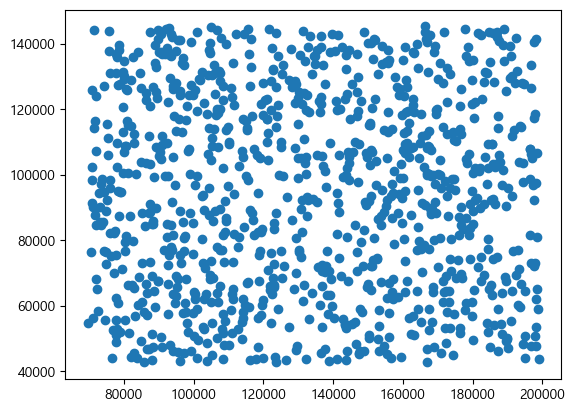

In [15]:
plt.scatter(df['X1'],df['Y1'])

In [25]:
df['X1'].min()

69759.332

In [33]:
def scale_x(x):
    return (x-df['X1'].min())/(df['X1'].max()-df['X1'].min())    

In [35]:
def scale_y(x):
    return (x-df['Y1'].min())/(df['Y1'].max()-df['Y1'].min())      

In [37]:
df['X1_scale'] = df['X1'].apply(scale_x)

In [39]:
df['Y1_scale'] = df['Y1'].apply(scale_y)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        1000 non-null   float64
 1   Y1        1000 non-null   float64
 2   X1_scale  1000 non-null   float64
 3   Y1_scale  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [43]:
df.head()

,X1,Y1,X1_scale,Y1_scale
0,151582.88060,74034.73453,0.632992,0.304952
1,94673.48517,61039.72531,0.192737,0.178302
2,121163.17440,116968.05230,0.397663,0.723384
3,78454.66336,127421.30740,0.067268,0.825262
4,175366.42630,68454.79138,0.816983,0.250570


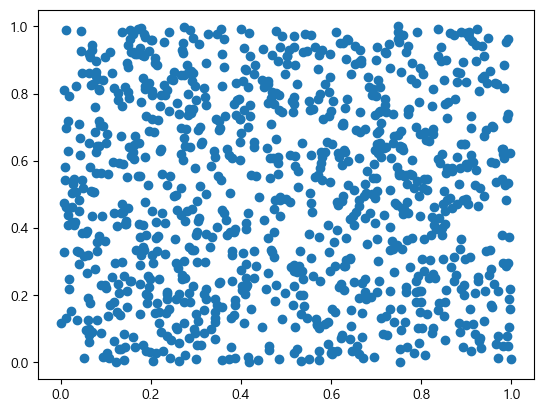

In [45]:
plt.scatter(df['X1_scale'],df['Y1_scale'])

In [47]:
df.describe()

,X1,Y1,X1_scale,Y1_scale
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,133376.413855,94366.569061,0.492146,0.503108
std,37253.850000,29811.472224,0.288198,0.290545
min,69759.332000,42744.982520,0.000000,0.000000
25%,100195.173175,67695.340308,0.235454,0.243168
50%,132605.022600,94735.387440,0.486178,0.506703
75%,166412.500925,120062.157850,0.747715,0.753539
max,199024.061400,145350.331400,1.000000,1.000000


In [51]:
train = pd.read_csv('poker-hand-training-true.data', names=["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "Label"])
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [61]:
def return_x(x):
    return x*(df['X1'].max()-df['X1'].min())+df['X1'].min()    

In [63]:
def return_y(x):
    return x*(df['Y1'].max()-df['Y1'].min())+df['Y1'].min()    

In [65]:
df['X1_ret'] = df['X1_scale'].apply(return_x)

In [69]:
df['Y1_ret'] = df['Y1_scale'].apply(return_y)

In [71]:
df

,X1,Y1,X1_scale,Y1_scale,X1_ret,Y1_ret
0,151582.88060,74034.73453,0.632992,0.304952,151582.88060,74034.73453
1,94673.48517,61039.72531,0.192737,0.178302,94673.48517,61039.72531
2,121163.17440,116968.05230,0.397663,0.723384,121163.17440,116968.05230
3,78454.66336,127421.30740,0.067268,0.825262,78454.66336,127421.30740
4,175366.42630,68454.79138,0.816983,0.250570,175366.42630,68454.79138
...,...,...,...,...,...,...
995,169434.27350,88293.16241,0.771092,0.443916,169434.27350,88293.16241
996,111054.66750,123785.71510,0.319463,0.789830,111054.66750,123785.71510
997,132363.16280,119859.46360,0.484307,0.751564,132363.16280,119859.46360
998,146469.50650,48349.09777,0.593435,0.054618,146469.50650,48349.09777


In [75]:
train['Label'].value_counts()

Label
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: count, dtype: int64

In [77]:
from sklearn.preprocessing import StandardScaler

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        1000 non-null   float64
 1   Y1        1000 non-null   float64
 2   X1_scale  1000 non-null   float64
 3   Y1_scale  1000 non-null   float64
 4   X1_ret    1000 non-null   float64
 5   Y1_ret    1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [93]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# x_data 선택 및 재구조화
x_data = df['X1'].values.reshape(-1, 1)  # 2D 형태로 변환

# StandardScaler 초기화 및 데이터 변환
transformer = StandardScaler()
transformer.fit(x_data)

# 변환된 데이터 출력
scaled_data = transformer.transform(x_data)
print(scaled_data)


[[ 4.88958237e-01]
 [-1.03941726e+00]
 [-3.28002358e-01]
 [-1.47499472e+00]
 [ 1.12769615e+00]
 [-8.92149284e-01]
 [ 7.54899816e-01]
 [ 7.29329734e-01]
 [-1.00294066e+00]
 [ 7.77743757e-01]
 [ 1.18136021e-01]
 [ 2.68870434e-01]
 [-7.79806409e-01]
 [-7.18932755e-01]
 [ 1.50927012e+00]
 [ 1.57051001e+00]
 [ 8.28294702e-01]
 [-1.21742317e+00]
 [-7.06709937e-01]
 [ 2.07093496e-01]
 [-1.61636805e+00]
 [-7.66177650e-01]
 [ 1.49420816e+00]
 [-6.56955463e-01]
 [-7.00714116e-01]
 [-9.13027662e-01]
 [ 5.55099033e-01]
 [ 7.49205028e-01]
 [-9.79446163e-01]
 [-6.90841288e-01]
 [ 1.03542705e+00]
 [-8.71850671e-01]
 [-1.44115621e+00]
 [-5.89193570e-01]
 [-1.38654688e+00]
 [-4.14515596e-01]
 [-2.46720679e-01]
 [-1.12550961e+00]
 [ 2.47523303e-01]
 [-1.59500219e+00]
 [ 1.38896832e+00]
 [ 1.49371645e+00]
 [ 1.20334579e+00]
 [ 8.01798088e-01]
 [-1.00199507e+00]
 [-6.12673848e-02]
 [ 1.75358360e+00]
 [-1.16491927e+00]
 [-6.28344818e-02]
 [ 4.57285856e-01]
 [-8.90783811e-01]
 [-1.26239559e+00]
 [-3.8613200

In [103]:
car_df = pd.read_csv('car_clean1.csv')

In [105]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6070 non-null   int64  
 1   Location             6070 non-null   object 
 2   Price                6070 non-null   float64
 3   Fuel_Type            6070 non-null   object 
 4   Transmission         6070 non-null   object 
 5   Owner_Type           6070 non-null   object 
 6   Mileage              6070 non-null   object 
 7   Power                6070 non-null   float64
 8   Seats                6070 non-null   float64
 9   Brand                6070 non-null   object 
 10  Age                  6070 non-null   int64  
 11  per_year_kilometers  6070 non-null   float64
 12  Region               6070 non-null   object 
 13  Level                6070 non-null   object 
 14  Seats_Group          6070 non-null   int64  
 15  Engine_Size          6070 non-null   f

In [107]:
car_df.head()

,Unnamed: 0,Location,Price,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Brand,Age,per_year_kilometers,Region,Level,Seats_Group,Engine_Size,Mileage_Value
0,0,Mumbai,2682.68,CNG,Manual,First,26.6 km/kg,58.16,5.0,Maruti,14,5142.857,West,lower,0,998.0,22.61
1,1,Pune,19162.00,Diesel,Manual,First,19.67 kmpl,126.20,5.0,Hyundai,9,4555.556,West,lower,0,1582.0,19.67
2,2,Chennai,6898.32,Petrol,Manual,First,18.2 kmpl,88.70,5.0,Honda,13,3538.462,South,lower,0,1199.0,18.20
3,3,Chennai,9197.76,Diesel,Manual,First,20.77 kmpl,88.76,7.0,Maruti,12,7250.000,South,lower,1,1248.0,20.77
4,4,Coimbatore,27194.71,Diesel,Automatic,Second,15.2 kmpl,140.80,5.0,Audi,11,3697.273,South,Luxury,0,1968.0,15.20


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   Y1      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [113]:
np.percentile(df['X1'],0.25)

70887.4558686

In [115]:
from sklearn.datasets import load_iris 
iris = load_iris()
iris_df = pd.DataFrame(data =iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

In [117]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [125]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# PCA 적용
pca = PCA(n_components=2)  # 여기에 원하는 주성분 개수를 지정할 수 있습니다.
pca.fit(iris_df)

# 주성분의 수식 (계수)
print("PCA Components (Principal Component Vectors):")
for i, component in enumerate(pca.components_):
    print(f"PC{i + 1}:")
    for feature, coef in zip(iris.feature_names, component):
        print(f"  {feature}: {coef:.4f}")
    print()

# 설명된 분산 비율
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio per Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i + 1}: {variance:.4f}")


PCA Components (Principal Component Vectors):
PC1:
  sepal length (cm): 0.3614
  sepal width (cm): -0.0845
  petal length (cm): 0.8567
  petal width (cm): 0.3583

PC2:
  sepal length (cm): 0.6566
  sepal width (cm): 0.7302
  petal length (cm): -0.1734
  petal width (cm): -0.0755

Explained Variance Ratio per Principal Component:
PC1: 0.9246
PC2: 0.0531


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터프레임 불러오기 (예: car_df)
# car_df = pd.read_csv('your_file.csv')  # 파일 경로에 맞게 데이터프레임을 불러오세요.

# 숫자형 데이터만 선택
numeric_features = car_df.select_dtypes(include=['float64', 'int64'])

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# PCA 수행
pca = PCA()
pca.fit(scaled_data)

# 계수 (주성분 로드)
components = pd.DataFrame(pca.components_, columns=numeric_features.columns)

# 분산
explained_variance = pca.explained_variance_ratio_

# 계수 출력
print("PCA Coefficients (Loadings):\n", components)

# 분산 출력
print("\nExplained Variance Ratio:\n", explained_variance)

# cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print("\nCumulative Explained Variance:\n", cumulative_variance)


In [163]:
vs = pd.read_csv('Value_sample.csv')

In [165]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      363 non-null    float64
 1   X2      362 non-null    float64
 2   X3      365 non-null    int64  
 3   X4      363 non-null    float64
 4   X5      364 non-null    float64
 5   Y1      363 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


In [167]:
vs.drop(columns = 'Y1', inplace = True)

In [169]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      363 non-null    float64
 1   X2      362 non-null    float64
 2   X3      365 non-null    int64  
 3   X4      363 non-null    float64
 4   X5      364 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.4 KB


In [177]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터프레임 불러오기 (예: vs_df)
# vs_df = pd.read_csv('your_file.csv')  # 파일 경로에 맞게 데이터프레임을 불러오세요.

# 결측치 처리 (예: 결측치 제거)
vs_df_cleaned = vs.dropna()  # 결측치가 있는 행을 제거합니다.

# 숫자형 데이터만 선택
numeric_features = vs_df_cleaned.select_dtypes(include=['float64', 'int64'])

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# PCA 적용
pca = PCA(n_components=3)
pca.fit(scaled_data)

# 주성분의 수식 (계수)
print("PCA Components (Principal Component Vectors):")
for i, component in enumerate(pca.components_):
    print(f"PC{i + 1}:")
    for feature, coef in zip(numeric_features.columns, component):
        print(f"  {feature}: {coef:.4f}")
    print()

# 설명된 분산 비율
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio per Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i + 1}: {variance:.4f}")

# 누적 설명된 분산 비율
cumulative_variance = explained_variance.cumsum()
print("\nCumulative Explained Variance:")
for i, cum_variance in enumerate(cumulative_variance):
    print(f"PC{i + 1}: {cum_variance:.4f}")


PCA Components (Principal Component Vectors):
PC1:
  X1: 0.4808
  X2: 0.4575
  X3: 0.4670
  X4: 0.4064
  X5: 0.4198

PC2:
  X1: 0.2163
  X2: 0.4751
  X3: 0.3053
  X4: -0.5957
  X5: -0.5286

PC3:
  X1: 0.2774
  X2: 0.0442
  X3: -0.3652
  X4: -0.6172
  X5: 0.6378

Explained Variance Ratio per Principal Component:
PC1: 0.6087
PC2: 0.1597
PC3: 0.0935

Cumulative Explained Variance:
PC1: 0.6087
PC2: 0.7684
PC3: 0.8619


In [187]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      363 non-null    float64
 1   X2      362 non-null    float64
 2   X3      365 non-null    int64  
 3   X4      363 non-null    float64
 4   X5      364 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.4 KB


In [215]:
vs_df1 = vs.dropna()
vs_df = vs.tail(3)
# 이동 가중 평균 함수
def moving_weighted_average(series, weights):
    return series.rolling(window=len(weights)).apply(lambda x: sum(weights * x), raw=True)

# 가중치 정의
weights = [0.2, 0.3, 0.5]  # 최근 3개 값에 대한 가중치

# 각 열에 대해 이동 가중 평균 계산
weighted_moving_avg_df = vs_df.copy()
for col in vs_df.columns:
    weighted_moving_avg_df[col] = moving_weighted_average(vs_df[col], weights)

# 결과 출력
print("Weighted Moving Average DataFrame:")
print(weighted_moving_avg_df)

Weighted Moving Average DataFrame:
         X1      X2      X3      X4      X5
362     NaN     NaN     NaN     NaN     NaN
363     NaN     NaN     NaN     NaN     NaN
364  6234.0  6222.7  6642.2  6659.7  5828.4


In [195]:
vs.tail(3)

,X1,X2,X3,X4,X5
362,5828.0,6043.0,6632,6397.0,5795.0
363,6243.0,6182.0,6636,6566.0,5823.0
364,6391.0,6319.0,6650,6821.0,5845.0


In [217]:
slope = pd.read_csv('Slope_Sample.csv')

In [219]:
slope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      692 non-null    float64
 1   Y1      692 non-null    float64
dtypes: float64(2)
memory usage: 10.9 KB


In [223]:
slope_poly1 = np.polyfit(slope['X1'],slope['Y1'],1)

In [227]:
print(f'x계수 = {slope_poly1[0]}, 절편 = {slope_poly1[1]}') 

x계수 = 0.9909342346439308, 절편 = 0.6943656490433988


In [231]:
bos_df = pd.read_csv('boston.csv')

In [233]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [235]:
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [239]:
bos_poly = np.polyfit(bos_df['DIS'],bos_df['MEDV'],1)
print(f'x계수 = {bos_poly[0]}, 절편 = {bos_poly[1]}') 

x계수 = 1.0916130158411101, 절편 = 18.390088330493374


In [265]:
bos_poly1 = np.polyfit(bos_df['RM'],bos_df['MEDV'],1)
print(f'x계수 = {bos_poly1[0]}, 절편 = {bos_poly1[1]}') 

x계수 = 9.102108981180313, 절편 = -34.67062077643858


In [253]:
import pandas as pd
import numpy as np

df = bos_df

# 종속 변수와 독립 변수 설정
y = df['MEDV']
x_columns = df.columns.drop('MEDV')  # MEDV를 제외한 나머지 열

# 계수와 절편을 저장할 딕셔너리
coefficients = {}

# 각 x 변수에 대해 polyfit 계산
for x_col in x_columns:
    # np.polyfit을 사용하여 1차 다항식 계산
    slope, intercept = np.polyfit(df[x_col], y, 1)  # 1차 회귀
    coefficients[x_col] = {'slope': slope, 'intercept': intercept}

# 결과 출력
for var_name, coeffs in coefficients.items():
    print(f"Variable: {var_name}, X계수: {coeffs['slope']:.4f}, 절편: {coeffs['intercept']:.4f}")


Variable: CRIM, X계수: -0.4152, 절편: 24.0331
Variable: ZN, X계수: 0.1421, 절편: 20.9176
Variable: INDUS, X계수: -0.6485, 절편: 29.7549
Variable: CHAS, X계수: 6.3462, 절편: 22.0938
Variable: NOX, X계수: -33.9161, 절편: 41.3459
Variable: RM, X계수: 9.1021, 절편: -34.6706
Variable: AGE, X계수: -0.1232, 절편: 30.9787
Variable: DIS, X계수: 1.0916, 절편: 18.3901
Variable: RAD, X계수: -0.4031, 절편: 26.3821
Variable: TAX, X계수: -0.0256, 절편: 32.9707
Variable: PTRATIO, X계수: -2.1572, 절편: 62.3446
Variable: B, X계수: 0.0336, 절편: 10.5510
Variable: LSTAT, X계수: -0.9500, 절편: 34.5538


In [259]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# 데이터셋 로드 (데이터프레임 생성 예시)

# 종속 변수와 독립 변수 설정
X = bos_df.drop(columns=['MEDV'])  # 모든 독립 변수
y = bos_df['MEDV']  # 종속 변수

# 데이터 분할 (훈련 세트와 테스트 세트) 
X_train = X
y_train = y

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 분석 결과 (상세 정보)
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          6.72e-135
Time:                        14:06:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

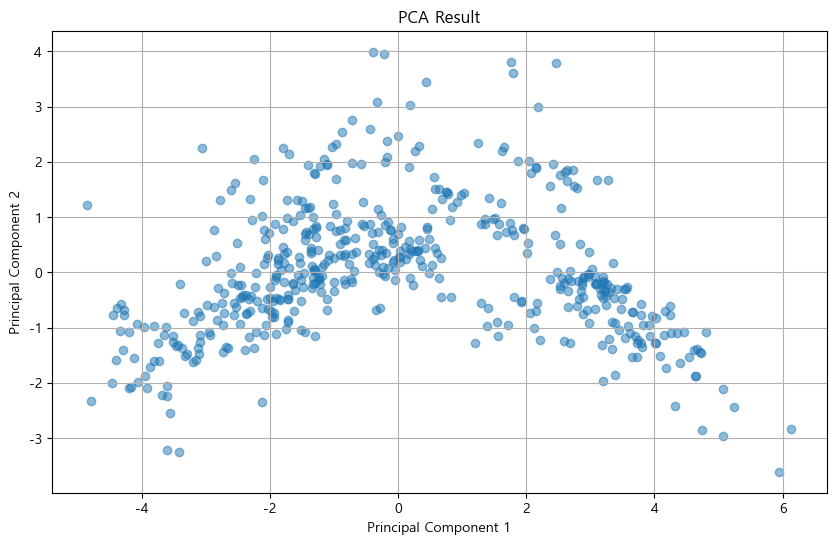

Explained Variance Ratio:
PC1: 0.4713
PC2: 0.1103

Cumulative Explained Variance:
PC1: 0.4713
PC2: 0.5815


In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = bos_df

# 독립 변수 설정
X = df.drop(columns=['MEDV'])  # MEDV를 제외한 독립 변수

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행
pca = PCA(n_components=2)  # 주성분의 수 (2차원으로 축소)
principal_components = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i in range(len(explained_variance)):
    print(f"PC{i + 1}: {explained_variance[i]:.4f}")

# 누적 설명된 분산 비율
cumulative_variance = explained_variance.cumsum()
print("\nCumulative Explained Variance:")
for i in range(len(cumulative_variance)):
    print(f"PC{i + 1}: {cumulative_variance[i]:.4f}")


# 강사님 데이터 회귀

In [268]:
ps_df = pd.read_csv('Prediction_Sample.csv')

In [270]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      423 non-null    float64
 1   X2      423 non-null    float64
 2   Y1      423 non-null    float64
dtypes: float64(3)
memory usage: 10.0 KB


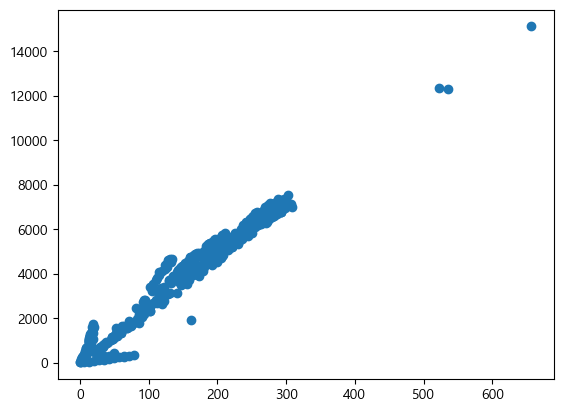

In [272]:
plt.scatter(ps_df['X1'], ps_df['Y1'])

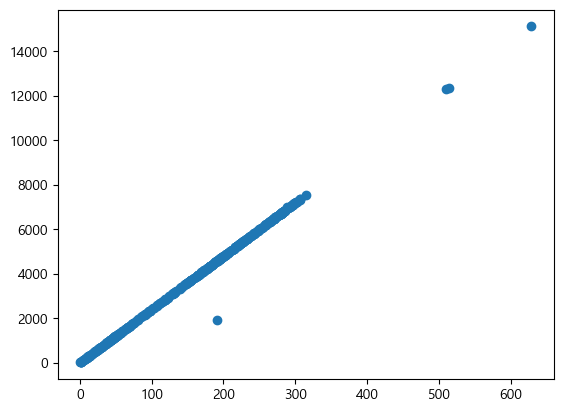

In [274]:
plt.scatter(ps_df['X2'], ps_df['Y1'])

In [280]:
ps_corr = ps_df.corr()
ps_corr['Y1']

X1    0.979455
X2    0.998490
Y1    1.000000
Name: Y1, dtype: float64

In [282]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = ps_df

# 독립 변수와 종속 변수 설정
X = df[['X1', 'X2']]  # 독립 변수
y = df['Y1']          # 종속 변수

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 및 절편
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept:.4f}")
print(f"Coefficients: X1: {coefficients[0]:.4f}, X2: {coefficients[1]:.4f}")

# 회귀 분석 결과 (상세 정보 제공을 위해 statsmodels 사용)
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())


Intercept: -1.6540
Coefficients: X1: 0.0498, X2: 23.9687
                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.788e+07
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:31:45   Log-Likelihood:                -1071.4
No. Observations:                 338   AIC:                             2149.
Df Residuals:                     335   BIC:                             2160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# boston_data 회귀

In [291]:
bs_corr = bos_df.corr()

In [331]:
bos_df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [299]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='B', ylabel='Count'>

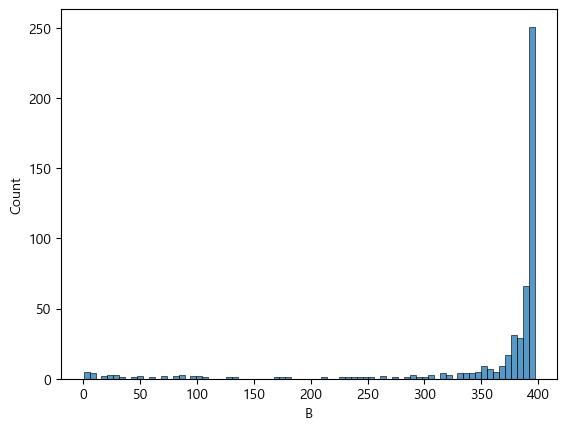

In [315]:
sns.histplot(bos_df['B'])

In [327]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# test size = 0.2

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     126.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.96e-110
Time:                        14:51:17   Log-Likelihood:                -1201.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     394   BIC:                             2462.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7362      5.721      5.373      0.0

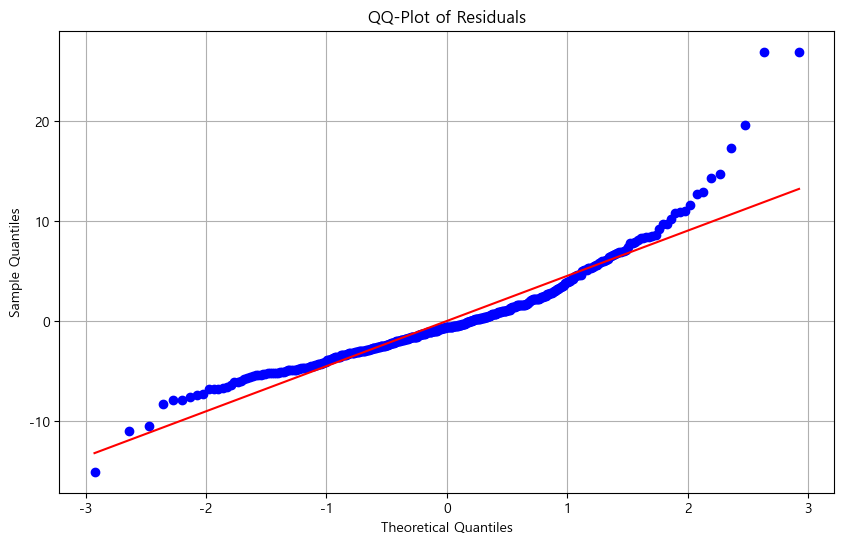

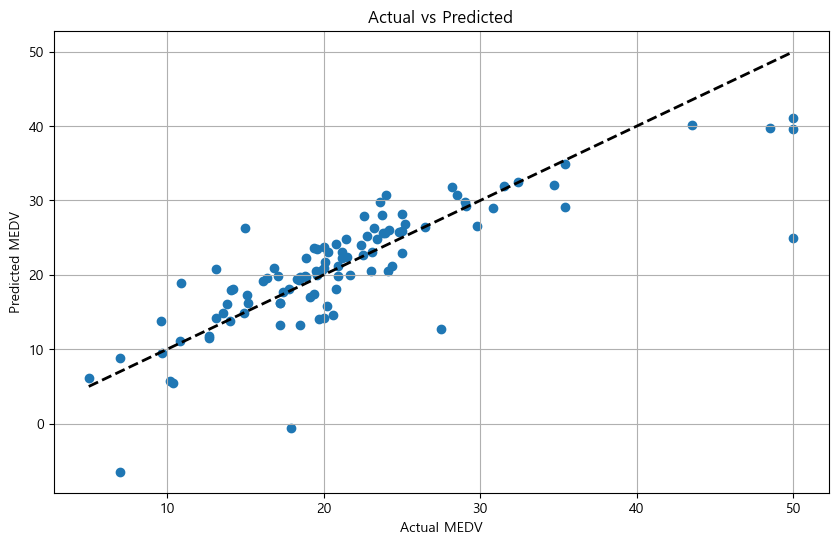

In [352]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 실제 데이터 불러오기 (your_file_path는 실제 데이터 파일 경로로 대체해주세요)
# bos_df = pd.read_csv('your_file_path.csv')

# 주어진 bos_df를 사용한다는 가정 - 실제 데이터프레임을 사용하세요.
# 1. MEDV는 Y 변수, 나머지 변수는 X 변수로 설정
X = bos_df.drop(columns=['MEDV','CHAS','INDUS','AGE','ZN'])
y = bos_df['MEDV']

# 3. 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 5. OLS를 사용하여 회귀 분석 결과 출력
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# 6. 테스트 세트의 오차 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nTest Set Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 7. QQ-Plot을 통한 잔차 분석
residuals = y_train - model.predict(X_train)
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

# 8. 예측값과 실제값의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid()
plt.show()


# test size = 0.4

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     89.74
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           7.31e-79
Time:                        14:51:40   Log-Likelihood:                -909.84
No. Observations:                 303   AIC:                             1840.
Df Residuals:                     293   BIC:                             1877.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4636      6.535      5.274      0.0

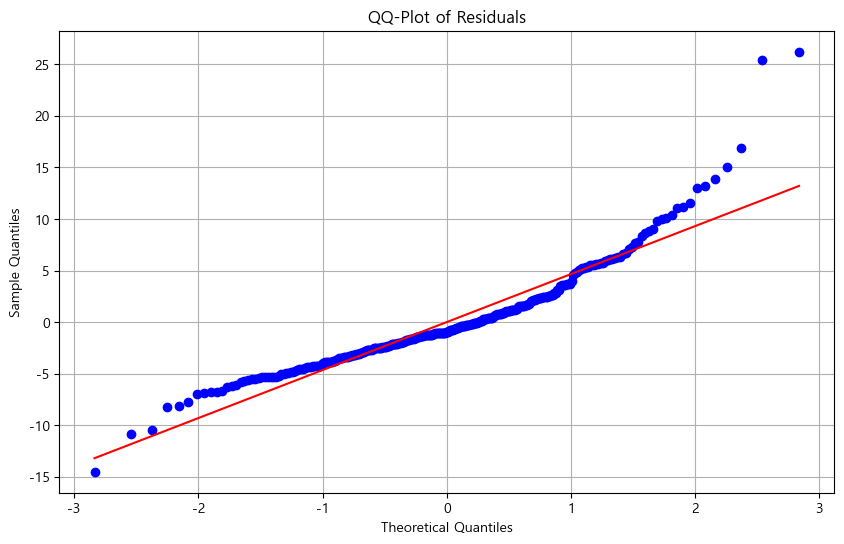

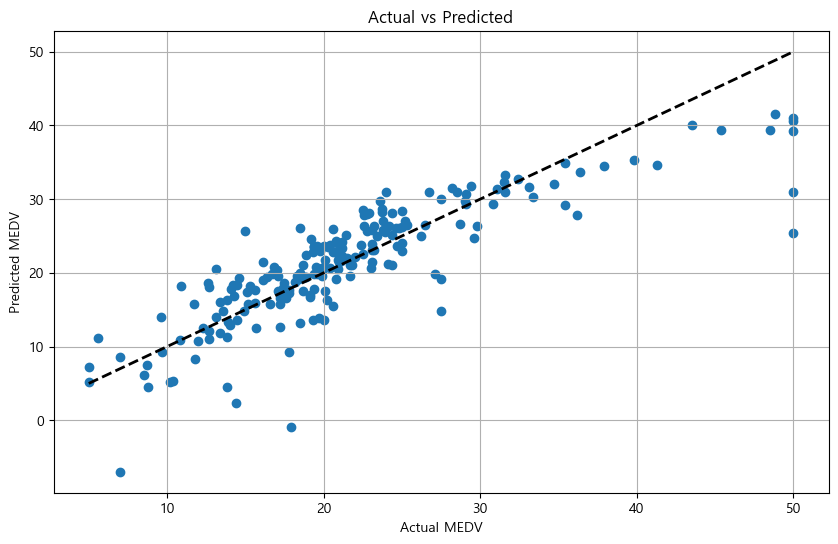

In [354]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 실제 데이터 불러오기 (your_file_path는 실제 데이터 파일 경로로 대체해주세요)
# bos_df = pd.read_csv('your_file_path.csv')

# 주어진 bos_df를 사용한다는 가정 - 실제 데이터프레임을 사용하세요.
# 1. MEDV는 Y 변수, 나머지 변수는 X 변수로 설정
X = bos_df.drop(columns=['MEDV','CHAS','INDUS','AGE','ZN'])
y = bos_df['MEDV']

# 3. 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 4. 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 5. OLS를 사용하여 회귀 분석 결과 출력
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# 6. 테스트 세트의 오차 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nTest Set Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 7. QQ-Plot을 통한 잔차 분석
residuals = y_train - model.predict(X_train)
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

# 8. 예측값과 실제값의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid()
plt.show()


# test_size = 0.5

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     82.54
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           8.64e-69
Time:                        14:51:52   Log-Likelihood:                -747.67
No. Observations:                 253   AIC:                             1515.
Df Residuals:                     243   BIC:                             1551.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0878      7.112      4.090      0.0

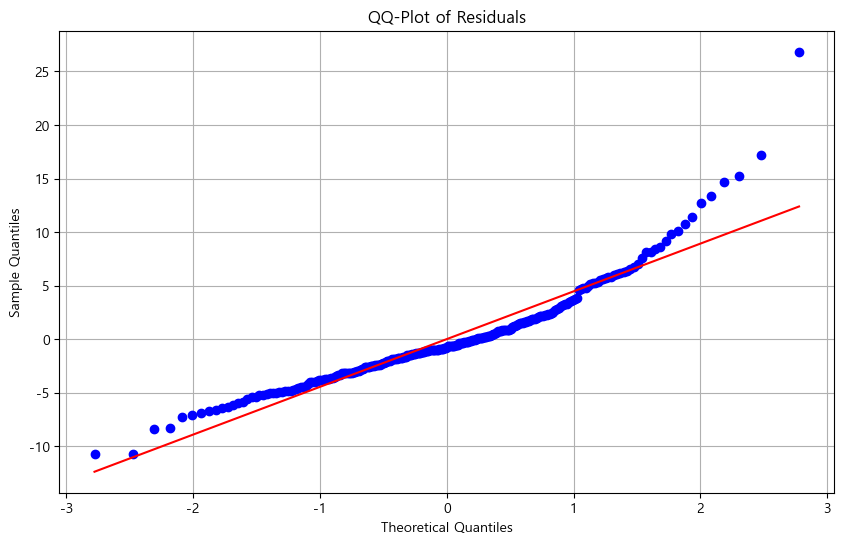

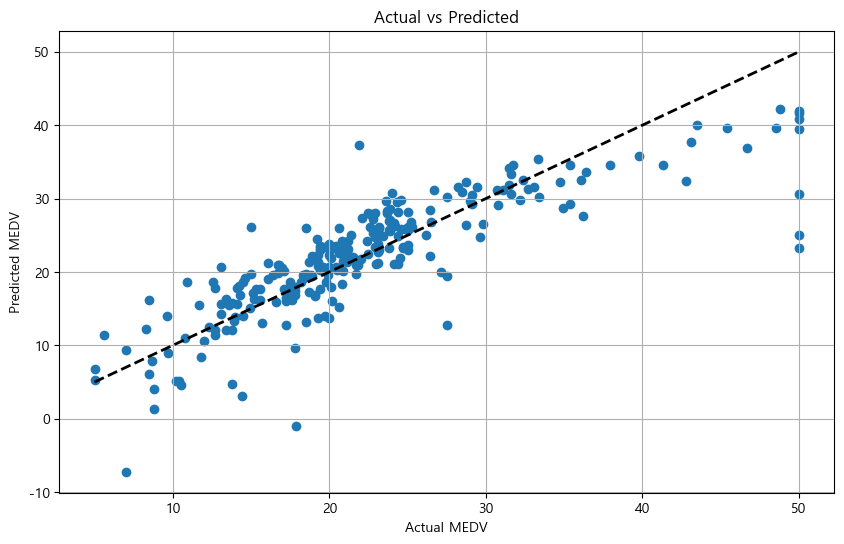

In [356]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 실제 데이터 불러오기 (your_file_path는 실제 데이터 파일 경로로 대체해주세요)
# bos_df = pd.read_csv('your_file_path.csv')

# 주어진 bos_df를 사용한다는 가정 - 실제 데이터프레임을 사용하세요.
# 1. MEDV는 Y 변수, 나머지 변수는 X 변수로 설정
X = bos_df.drop(columns=['MEDV','CHAS','INDUS','AGE','ZN'])
y = bos_df['MEDV']

# 3. 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 4. 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 5. OLS를 사용하여 회귀 분석 결과 출력
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# 6. 테스트 세트의 오차 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nTest Set Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 7. QQ-Plot을 통한 잔차 분석
residuals = y_train - model.predict(X_train)
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

# 8. 예측값과 실제값의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid()
plt.show()



# 주성분 해서 회귀 돌리기 

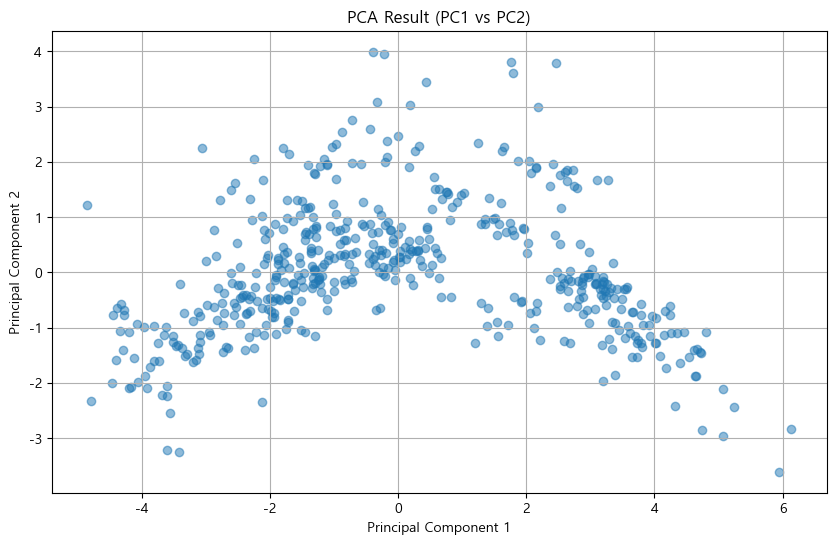

Explained Variance Ratio:
PC1: 0.4713
PC2: 0.1103
PC3: 0.0956
PC4: 0.0660

Cumulative Explained Variance:
PC1: 0.4713
PC2: 0.5815
PC3: 0.6771
PC4: 0.7431

PCA Loadings (Variable Contributions):
              PC1       PC2       PC3       PC4
CRIM     0.250951 -0.315252  0.246566  0.061771
ZN      -0.256315 -0.323313  0.295858  0.128712
INDUS    0.346672  0.112493 -0.015946  0.017146
CHAS     0.005042  0.454829  0.289781  0.815941
NOX      0.342852  0.219116  0.120964 -0.128226
RM      -0.189243  0.149332  0.593961 -0.280592
AGE      0.313671  0.311978 -0.017675 -0.175206
DIS     -0.321544 -0.349070 -0.049736  0.215436
RAD      0.319793 -0.271521  0.287255  0.132350
TAX      0.338469 -0.239454  0.220744  0.103335
PTRATIO  0.204942 -0.305897 -0.323446  0.282622
B       -0.202973  0.238559 -0.300146  0.168498
LSTAT    0.309760 -0.074322 -0.267000  0.069414


<Figure size 1200x600 with 0 Axes>

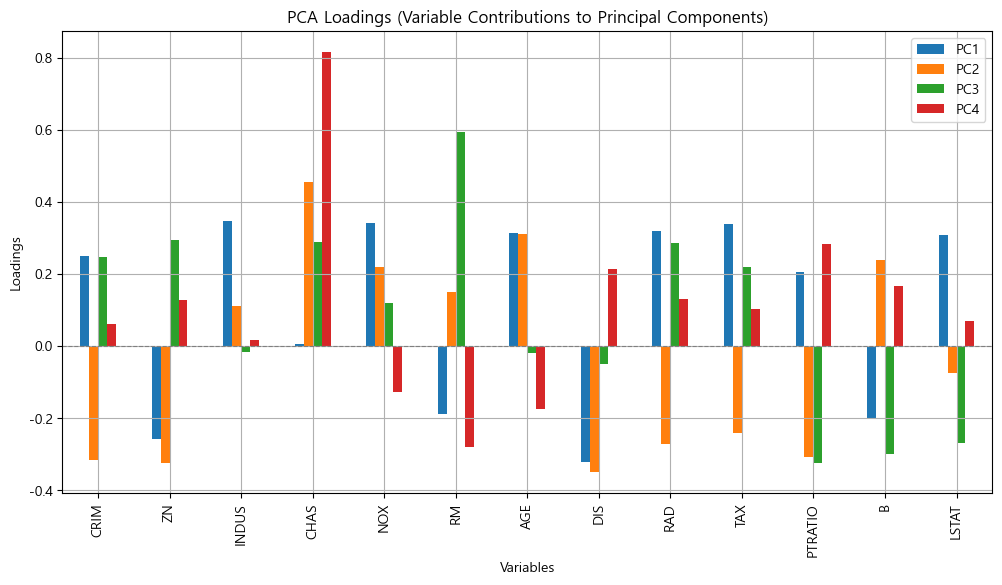

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터프레임에 원본 데이터 할당
df = bos_df

# 독립 변수 설정
X = df.drop(columns=['MEDV'])  # MEDV를 제외한 독립 변수

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 - 주성분 수를 4로 변경
pca = PCA(n_components=4)  # 4차원으로 축소
principal_components = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(4)])

# PCA 결과 시각화 (PC1과 PC2만 시각화)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Result (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i in range(len(explained_variance)):
    print(f"PC{i + 1}: {explained_variance[i]:.4f}")

# 누적 설명된 분산 비율
cumulative_variance = explained_variance.cumsum()
print("\nCumulative Explained Variance:")
for i in range(len(cumulative_variance)):
    print(f"PC{i + 1}: {cumulative_variance[i]:.4f}")

# PCA 부하량 출력 (주요 변수를 확인)
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(4)])
print("\nPCA Loadings (Variable Contributions):")
print(loadings)

# 주요 변수의 기여도 시각화
plt.figure(figsize=(12, 6))
loadings.plot(kind='bar', figsize=(12, 6))
plt.title('PCA Loadings (Variable Contributions to Principal Components)')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', lw=0.8, ls='--')
plt.grid()
plt.show()


# 랜덤 x변수 생성해서 y값 예측

In [372]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     126.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.96e-110
Time:                        15:12:16   Log-Likelihood:                -1201.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     394   BIC:                             2462.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7362      5.721      5.373      0.0

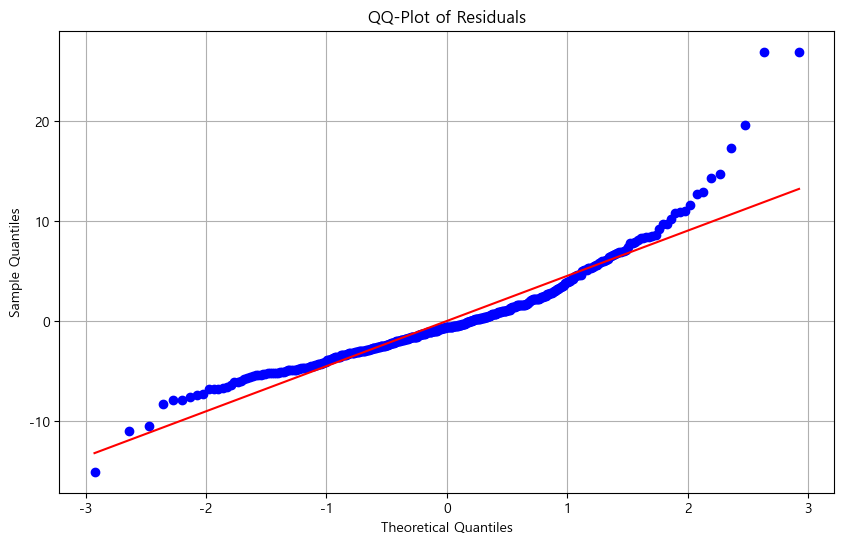

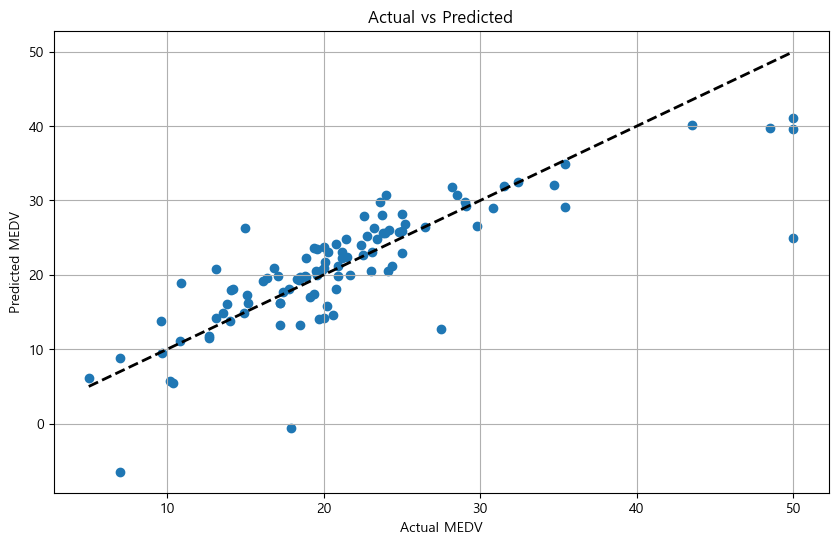

In [376]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 실제 데이터 불러오기 (your_file_path는 실제 데이터 파일 경로로 대체해주세요)
# bos_df = pd.read_csv('your_file_path.csv')

# 주어진 bos_df를 사용한다는 가정 - 실제 데이터프레임을 사용하세요.
# 1. MEDV는 Y 변수, 나머지 변수는 X 변수로 설정
X = bos_df.drop(columns=['MEDV','CHAS','INDUS','AGE','ZN'])
y = bos_df['MEDV']

# 3. 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 5. OLS를 사용하여 회귀 분석 결과 출력
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# 6. 테스트 세트의 오차 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nTest Set Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 7. QQ-Plot을 통한 잔차 분석
residuals = y_train - model.predict(X_train)
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

# 8. 예측값과 실제값의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid()
plt.show()

# 값의 범위가 너무 넓기 때문에 Random으로 생성할 경우 음수 값이 발생하여 난수를 분포 기반으로 생성하는 것으로 결정

In [378]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 주어진 bos_df 데이터프레임을 사용
# 실제 데이터는 아래 주석을 해제하여 사용하세요
# bos_df = pd.read_csv('your_file_path.csv')

# X와 y 설정
X = bos_df.drop(columns=['MEDV', 'CHAS', 'INDUS', 'AGE', 'ZN'])
y = bos_df['MEDV']

# 데이터 훈련 및 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 1. 각 X변수에 대해 X범위 안에서 50개의 난수 생성
random_samples = {}
for column in X.columns:
    lower_bound = X[column].min()
    upper_bound = X[column].max()
    random_samples[column] = np.random.uniform(lower_bound, upper_bound, size=50)  # 50개의 난수 생성

random_df = pd.DataFrame(random_samples)

# 2. 최종 모델을 활용하여 Y값 예측
y_predicted = model.predict(random_df)

# 3. 예측된 값 출력
print("Predicted Values for the Random Sample:")
print(y_predicted)


Predicted Values for the Random Sample:
[ 28.39308823  15.8575127   16.99158785  23.71054877  22.8278582
  31.89718361   7.13475092  12.96616585  21.1933537    5.7834231
  16.52285656  18.59672215 -15.70415157  23.9469145   15.41456371
  -4.99841645   0.67838899  22.36638645  14.77914078 -14.68571295
  -0.85138639  17.92107141  10.39327003  30.68646258   9.28905084
  -9.90622746   4.50074514  -5.06867363  11.65116689   9.0593253
   8.04028094 -22.74393133  19.31330567  -0.48312112   7.19293783
  20.1633752  -11.49666667   7.81074055  -6.30192485  -7.43089966
  -3.25772737  -1.23447349  18.11575494   6.14597637  -2.14829599
  14.11760136   9.24824987   3.55505946   6.34290163  10.81576892]


# 분포 기반일시 안정적인 양수의 값이 예측값으로 나옴 

In [380]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 주어진 bos_df 데이터프레임을 사용
# 실제 데이터는 아래 주석을 해제하여 사용하세요
# bos_df = pd.read_csv('your_file_path.csv')

# X와 y 설정
X = bos_df.drop(columns=['MEDV', 'CHAS', 'INDUS', 'AGE', 'ZN'])
y = bos_df['MEDV']

# 데이터 훈련 및 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 1. 각 X변수에 대해 실제 분포에 따라 난수 생성
random_samples = {}
for column in X.columns:
    # 정규 분포에 따른 난수 생성 (출처: 컬럼의 평균과 표준편차)
    mean = X[column].mean()
    std = X[column].std()
    
    # 정규분포에 따라 난수 50개 생성
    random_samples[column] = np.random.normal(loc=mean, scale=std, size=50)  # 50개의 난수 생성

random_df = pd.DataFrame(random_samples)

# 2. 최종 모델을 활용하여 Y값 예측
y_predicted = model.predict(random_df)

# 3. 예측된 값 출력
print("Predicted Values for the Random Sample:")
print(y_predicted)


Predicted Values for the Random Sample:
[26.96750365 29.41744895 18.86330955 23.90716839 35.59334253 16.78563233
 20.67689077 17.47345911 25.71447767 19.08958908 24.96302629 24.07837925
 13.62142348 13.42300114 27.39820138 19.31677307 15.52311548 27.6085651
 28.04698388 28.70085501 20.52373046 23.42652308 29.69425369 26.86724478
 21.24964796 27.25990919 20.66278053 29.20205164 13.90310849 12.06858739
 32.22403955 16.14234398 12.31990411 24.83125356 22.81835112 25.5169198
 14.41103031 33.95749231  1.83225357  8.45452926 24.96185242 25.94705662
 14.06363359 29.78350258 35.93165128 29.63850117 28.89460142 16.62126733
 17.42790335 30.25291102]


In [384]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='Count'>

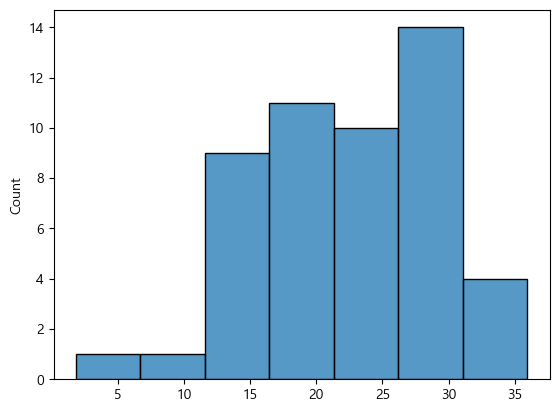

In [386]:
sns.histplot(y_predicted)

<Axes: xlabel='MEDV', ylabel='Count'>

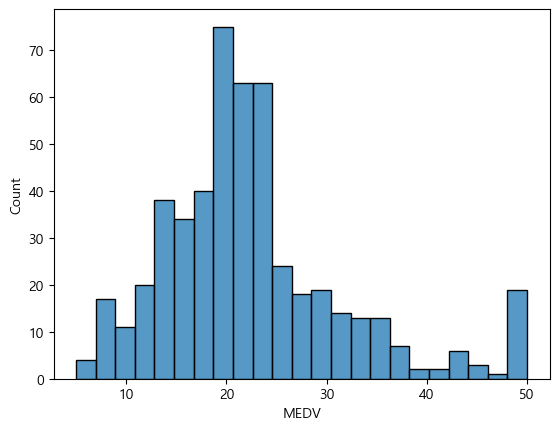

In [388]:
sns.histplot(bos_df['MEDV'])

In [411]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as slt

df = ps_df

# 독립 변수와 종속 변수 설정
X = df[['X1', 'X2']]  # 독립 변수
y = df['Y1']          # 종속 변수

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 및 절편
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept:.4f}")
print(f"Coefficients: X1: {coefficients[0]:.4f}, X2: {coefficients[1]:.4f}")

# 회귀 분석 결과 (상세 정보 제공을 위해 statsmodels 사용)
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# X_test에 상수 항 추가
X_test_sm = sm.add_constant(X_test)

# 1. OLS 모델을 사용하여 예측합니다.
predict_X = ols_model.predict(X_test_sm)

# 2. MAE 계산
MAE_score = slt.mean_absolute_error(y_test, predict_X)

# MAE 출력
print(f"Mean Absolute Error (MAE): {MAE_score:.4f}")

# 3. MSE 계산
MSE_score = slt.mean_squared_error(y_test, predict_X)

# MAE 출력
print(f"Mean squared Error (MSE): {MSE_score:.4f}")

# 3. RMSE 계산
RMSE_score = (slt.mean_squared_error(y_test, predict_X)) ** 0.5

# RMSE 출력
print(f"Mean root-squared Error (MSE): {RMSE_score:.4f}")

# test_set R-score
R2_score = slt.r2_score(y_test,predict_X)
print(f"R2-Score : {R2_score:.4f}")

Intercept: -1.6540
Coefficients: X1: 0.0498, X2: 23.9687
                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.788e+07
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:37:06   Log-Likelihood:                -1071.4
No. Observations:                 338   AIC:                             2149.
Df Residuals:                     335   BIC:                             2160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# boston_data  error통계 값 구하기

In [419]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 실제 데이터 불러오기 (your_file_path는 실제 데이터 파일 경로로 대체해주세요)
# bos_df = pd.read_csv('your_file_path.csv')

# 주어진 bos_df를 사용한다는 가정 - 실제 데이터프레임을 사용하세요.
# 1. MEDV는 Y 변수, 나머지 변수는 X 변수로 설정
X = bos_df.drop(columns=['MEDV','CHAS','INDUS','AGE','ZN'])
y = bos_df['MEDV']

# 3. 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 5. OLS를 사용하여 회귀 분석 결과 출력
X_train_sm = sm.add_constant(X_train)  # 상수 항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# 6. 테스트 세트의 오차 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
R2_score = r2_score(y_test,y_pred)

print("\nTest Set Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean root - squared Error (RMSE): {rmse:.4f}")
print(f"R2-Score: {R2_score:.4f}")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     126.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.96e-110
Time:                        16:42:23   Log-Likelihood:                -1201.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     394   BIC:                             2462.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7362      5.721      5.373      0.0